<a href="https://colab.research.google.com/github/VrindaK23/EComm-RecSys/blob/main/Project_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation System for E-Commerce🛍️🛒**

###📦 **Fixing Compatibility Issues: NumPy & Scikit-Surprise**
To resolve the compatibility error between NumPy 2.x and the scikit-surprise library, we downgrade NumPy to a stable version (1.24.4) and reinstall scikit-surprise to rebuild it properly.

`💡 Note: After running the cell below, you must restart the runtime before continuing.`

In [2]:
!pip install numpy==1.24.4
!pip install scikit-surprise --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 38.9 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
^C


## ✅ E-Commerce Recommendation System Checklist

### **1. Problem Definition & Business Understanding**
✅ Define project goals and objectives  
✅ Identify recommendation techniques (CF, CBF, Hybrid)

### **2. Data Collection & Understanding**
✅ Load e-commerce transaction dataset  
✅ Perform basic data exploration and visualization  

### **3. Data Preprocessing & Feature Engineering**
✅ Clean and preprocess dataset  
✅ Encode categorical variables  
✅ Normalize numerical features (where needed)  

### **4. Model Development**
#### Collaborative Filtering (CF)
✅ Load Surprise Library  
✅ Implement SVD (matrix factorization technique)  
✅ Train-Test Split using Surprise  
⬜ Evaluate SVD Model (RMSE, MAE, etc.)  
⬜ Optimize and fine-tune hyperparameters

#### Content-Based Filtering (CBF)
✅ Extract product features using TF-IDF  
✅ Build cosine similarity matrix  
⬜ Generate user-personalized recommendations  
⬜ Apply filters for duplicate/removal/relevance  
⬜ Evaluate model on sample queries or user history

#### Hybrid Recommendation System
⬜ Design method to combine CF and CBF (e.g., weighted average)  
⬜ Implement hybrid scoring and ranking system  
⬜ Generate final recommendations  

### **5. Model Evaluation & Optimization**
⬜ Compare CF vs. CBF performance  
⬜ Measure metrics: RMSE, Precision@K, Recall@K  
⬜ Tune model parameters based on results  

### **6. Deployment & Integration**
⬜ Export trained models (pickle/joblib)  
⬜ Build minimal Flask web app or script interface  
⬜ Integrate user input and output recommendations  

### **7. Documentation & Reporting**
⬜ Add markdown explanations in notebook  
⬜ Document all stages with assumptions/decisions  
⬜ Prepare presentation/report  

In [1]:
from IPython.display import Markdown, display

def progress_tracker():
    progress_md = """
### 🧭 **E-Commerce Recommendation System Progress Tracker**

| 📌 Task                                              | ✅ Status       |
|------------------------------------------------------|-----------------|
| Define business goals & project scope                | ✅ Completed     |
| Select recommendation approach (CF, CBF, Hybrid)     | ✅ Completed     |
| Load and explore dataset                             | ✅ Completed     |
| Data preprocessing                                   | ✅ Completed     |
| Build Collaborative Filtering (User-based, Item-based) | ✅ Implemented   |
| CF Optimization & Hyperparameter Tuning              | ⬜ In Progress   |
| Extract product features for CBF                     | ⬜ Not Started   |
| Build Content-Based Filtering model                  | ⬜ Not Started   |
| Combine CF & CBF for Hybrid approach                 | ⬜ Not Started   |
| Model Evaluation (RMSE, Precision, Recall)           | ⬜ Not Started   |
| Deployment using Flask/Django                        | ⬜ Not Started   |
| Documentation & final presentation                   | ⬜ In Progress   |
"""
    display(Markdown(progress_md))

# Call the function to display the progress tracker
progress_tracker()



### 🧭 **E-Commerce Recommendation System Progress Tracker**

| 📌 Task                                              | ✅ Status       |
|------------------------------------------------------|-----------------|
| Define business goals & project scope                | ✅ Completed     |
| Select recommendation approach (CF, CBF, Hybrid)     | ✅ Completed     |
| Load and explore dataset                             | ✅ Completed     |
| Data preprocessing                                   | ✅ Completed     |
| Build Collaborative Filtering (User-based, Item-based) | ✅ Implemented   |
| CF Optimization & Hyperparameter Tuning              | ⬜ In Progress   |
| Extract product features for CBF                     | ⬜ Not Started   |
| Build Content-Based Filtering model                  | ⬜ Not Started   |
| Combine CF & CBF for Hybrid approach                 | ⬜ Not Started   |
| Model Evaluation (RMSE, Precision, Recall)           | ⬜ Not Started   |
| Deployment using Flask/Django                        | ⬜ Not Started   |
| Documentation & final presentation                   | ⬜ In Progress   |


## **🔗Mounting the Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **🔎Dataset Overview**
This dataset contains fashion product details, which will be used to build a recommendation system.
We will explore its structure, check for missing values, duplicates, and analyze numerical and categorical features.

## **📌 Phase 1: Data Preparation & Exploration**

### **Step 1: Load the Dataset**

We begin by loading our dataset from a CSV file using Pandas.  
This dataset contains fashion product details, which we will analyze  
before implementing a recommendation system.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets📊/fashion_products.csv'
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows
display(df.head())

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


### **Step 2: Check Basic Information**

Before proceeding, let's examine the dataset's structure:  
- Column names  
- Data types  
- Number of missing values  
- Number of duplicate rows

In [5]:
# Display column names and data types
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB

Missing Values in Each Column:
User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Number of Duplicate Rows: 0


### **🔹Basic Statistics**

We'll now generate summary statistics to understand numerical columns  
(such as prices, ratings, etc.) and get insights into data distribution.

In [6]:
# Summary statistics of numerical columns
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


### **Step 3: Data Cleaning & Preprocessing**

#### **🔹Standardizing Column Names**

Column names should be consistent to avoid errors in processing.  
We'll convert them to lowercase and replace spaces with underscores.

In [7]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Display updated column names
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['user_id', 'product_id', 'product_name', 'brand', 'category', 'price',
       'rating', 'color', 'size'],
      dtype='object')


### **🔹Checking for Inconsistent Data**

We'll now check for incorrect values, such as:  
- Negative prices (if applicable)  
- Unusual ratings (e.g., greater than 5 if the scale is 1-5)  
- Incorrect category names (e.g., typos)


In [8]:
# Check for negative or zero prices (if applicable)
if "price" in df.columns:
    print("Negative or Zero Price Count:", (df["price"] <= 0).sum())

    # Remove invalid price values if any
    df = df[df["price"] > 0]

# Check for ratings out of expected range (1-5)
if "rating" in df.columns:
    print("Ratings out of Range:", df[(df["rating"] < 1) | (df["rating"] > 5)].shape[0])

    # Filter out incorrect ratings (assuming scale of 1-5)
    df = df[(df["rating"] >= 1) & (df["rating"] <= 5)]
    print(df)
    print(len(df))

Negative or Zero Price Count: 0
Ratings out of Range: 0
     user_id  product_id product_name   brand         category  price  \
0         19           1        Dress  Adidas    Men's Fashion     40   
1         97           2        Shoes     H&M  Women's Fashion     82   
2         25           3        Dress  Adidas  Women's Fashion     44   
3         57           4        Shoes    Zara    Men's Fashion     23   
4         79           5      T-shirt  Adidas    Men's Fashion     79   
..       ...         ...          ...     ...              ...    ...   
995       20         996        Shoes    Zara  Women's Fashion     55   
996       42         997      Sweater    Nike    Kids' Fashion     13   
997        9         998      Sweater    Zara    Men's Fashion     47   
998        8         999      T-shirt    Zara  Women's Fashion     68   
999       91        1000        Shoes  Adidas  Women's Fashion     79   

       rating   color size  
0    1.043159   Black   XL  
1    4.02

### **🔹Scaling Data**

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical features for scaling
numerical_features = ['price', 'rating']

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check results
print(df.head())

   user_id  product_id product_name   brand         category     price  \
0       19           1        Dress  Adidas    Men's Fashion  0.333333   
1       97           2        Shoes     H&M  Women's Fashion  0.800000   
2       25           3        Dress  Adidas  Women's Fashion  0.377778   
3       57           4        Shoes    Zara    Men's Fashion  0.144444   
4       79           5      T-shirt  Adidas    Men's Fashion  0.766667   

     rating   color size  
0  0.010582   Black   XL  
1  0.758829   Black    L  
2  0.586148  Yellow   XL  
3  0.012179   White    S  
4  0.828144   Black    M  


## **📌 Phase 2: Exploratory Data Analysis (EDA)**

### **Step 1: Dataset Overview**

Before diving into specific analyses, we will check:  
- The total number of records  
- Unique values in key columns (e.g., products, categories, brands)  
- Basic summary statistics

In [10]:
# Check total records
print(f"Total records: {df.shape[0]}")

# Check number of unique products, categories, and brands (if applicable)
if "product_id" in df.columns:
    print(f"Unique products: {df['product_id'].nunique()}")

if "category" in df.columns:
    print(f"Unique categories: {df['category'].nunique()}")
    print("Categories:", df["category"].unique())

if "brand" in df.columns:
    print(f"Unique brands: {df['brand'].nunique()}")
    print("Brands:", df["brand"].unique())

# Display summary statistics
df.describe()

Total records: 1000
Unique products: 1000
Unique categories: 3
Categories: ["Men's Fashion" "Women's Fashion" "Kids' Fashion"]
Unique brands: 5
Brands: ['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']


,user_id,product_id,price,rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,0.508722,0.499666
std,28.78131,288.819436,0.292131,0.289237
min,1.00000,1.000000,0.000000,0.000000
25%,26.00000,250.750000,0.255556,0.248763
50%,50.00000,500.500000,0.522222,0.497376
75%,75.00000,750.250000,0.758333,0.748462
max,100.00000,1000.000000,1.000000,1.000000


### **Step 2: Price Distribution**

Understanding the price distribution helps identify:  
- The average price range  
- The presence of outliers (extremely high or low prices)  
- Whether prices follow a normal distribution  
We will visualize this using histograms and boxplots.

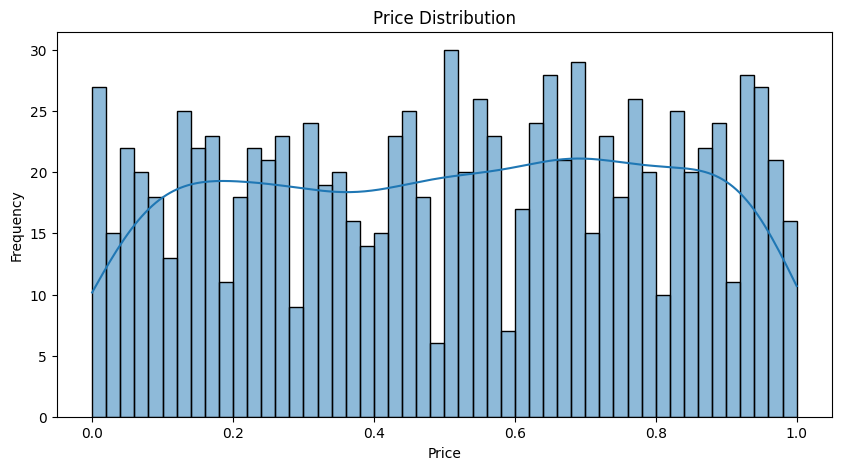

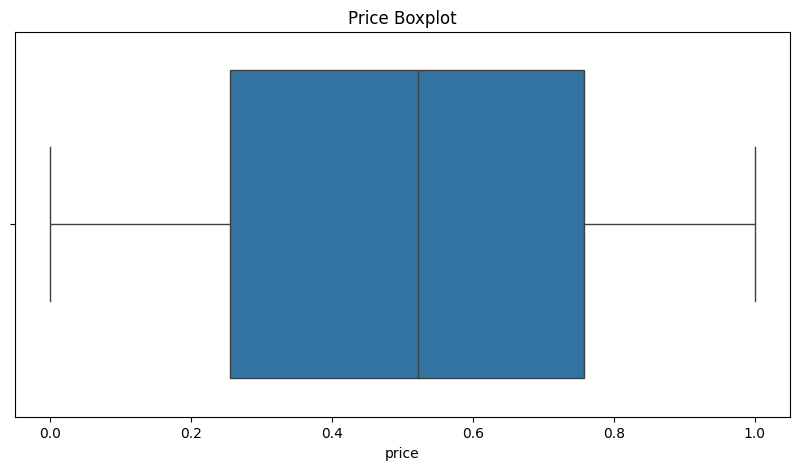

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if price column exists
if "price" in df.columns:
    plt.figure(figsize=(10,5))

    # Histogram
    sns.histplot(df["price"], bins=50, kde=True)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df["price"])
    plt.title("Price Boxplot")
    plt.show()

### ***Price Distribution Analysis***🛍️

📊 **Histogram Insights:**

Prices are spread out fairly evenly, meaning there is no single price range that dominates.

Most prices seem to be balanced without extreme highs or lows.

📉 **Boxplot Insights:**

The median (middle price) is centered, suggesting no strong bias towards cheap or expensive products.

There are no extreme outliers, meaning pricing is fairly consistent.

👉 **Conclusion:** The price distribution looks well-balanced, with no major issues like extreme price variations. This means the dataset is clean and doesn’t need much adjustment before analysis.

### **Step 3: Rating Distribution**

Ratings indicate user preferences and satisfaction.  
We will check the distribution to identify:  
- The most common ratings  
- Any missing or unusual values  
- Whether users tend to give higher or lower ratings

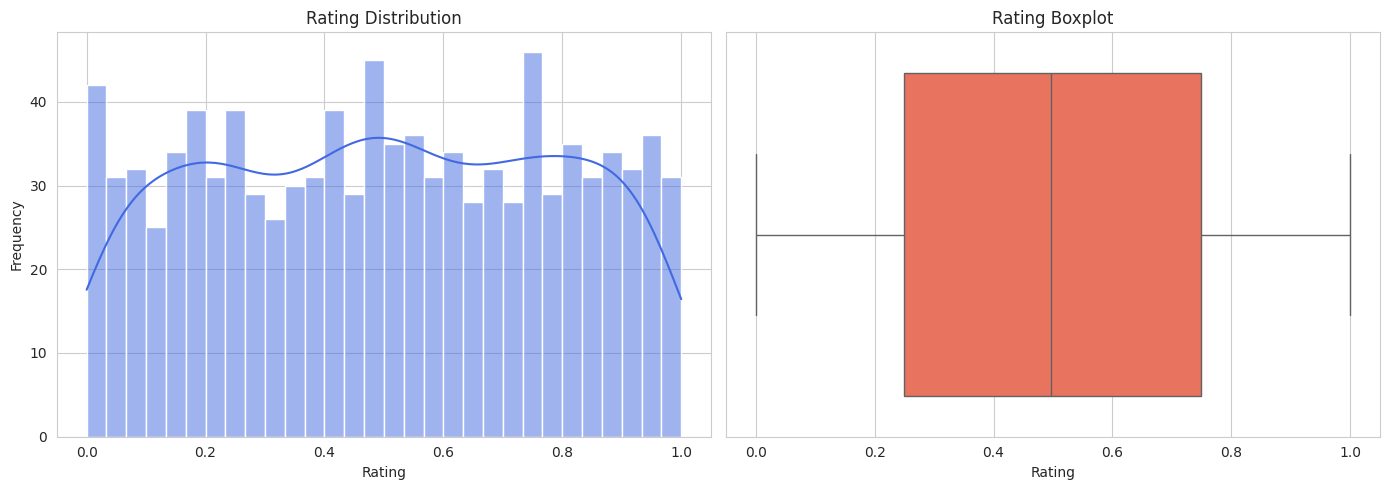

In [12]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE for Rating Distribution
sns.histplot(data=df, x="rating", bins=30, kde=True, ax=axes[0], color="royalblue", alpha=0.5)
axes[0].set_title("Rating Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Boxplot for Rating
sns.boxplot(data=df, x="rating", ax=axes[1], color="tomato")
axes[1].set_title("Rating Boxplot")
axes[1].set_xlabel("Rating")

# Show plots
plt.tight_layout()
plt.show()

### 📌 ***Rating Distribution Analysis*** 🏆
Based on the histogram and boxplot, here’s what we can conclude about the ratings:

📊 **Histogram Insights** (Left Plot)

- Ratings are spread relatively evenly across the range (0 to 1).
- There is no strong peak at any particular rating, suggesting diverse user feedback.
- The KDE line indicates a slight increase in mid-to-high ratings, meaning users may prefer to give moderate or high ratings rather than extremely low ones.

📉 **Boxplot Insights** (Right Plot)

- The ratings are symmetrically distributed, with no extreme outliers.
- The median (middle value) is near 0.5, which suggests a balanced mix of high and low ratings.
- The interquartile range (IQR) spans almost the entire range, meaning ratings are well-distributed.

👉 **Conclusion:**

- The rating data appears well-balanced, with no major outliers or unusual patterns.
- Users are not biased toward only giving high (near 1) or low (near 0) ratings.
- This dataset is clean and usable for recommendation modeling without requiring much preprocessing.

### **Step 4: Most Popular Categories**

We will identify the most common product categories to understand user preferences in this dataset.

category
Kids' Fashion      351
Women's Fashion    327
Men's Fashion      322
Name: count, dtype: int64


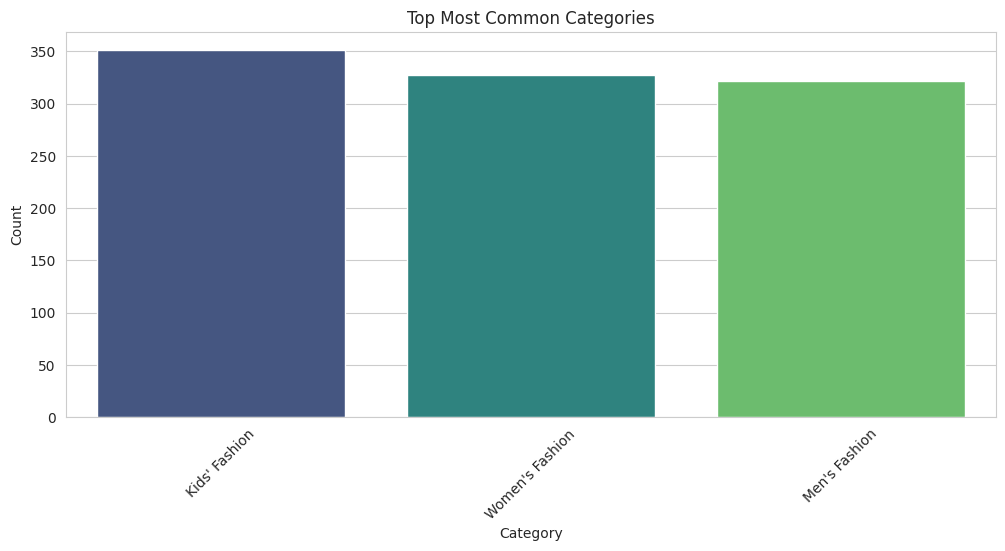

In [13]:
# Get the top 10 most common categories
top_categories = df["category"].value_counts().head(10)

print(top_categories)
# Convert index to string (if it's numerical or float)
top_categories.index = top_categories.index.astype(str)

# Set figure size
plt.figure(figsize=(12, 5))

# Updated barplot
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="viridis", legend=False)

# Labels & Title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top Most Common Categories")

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()


### **Step 5: Most Popular Brands**

We will analyze which brands are the most common  
to get insights into brand popularity.

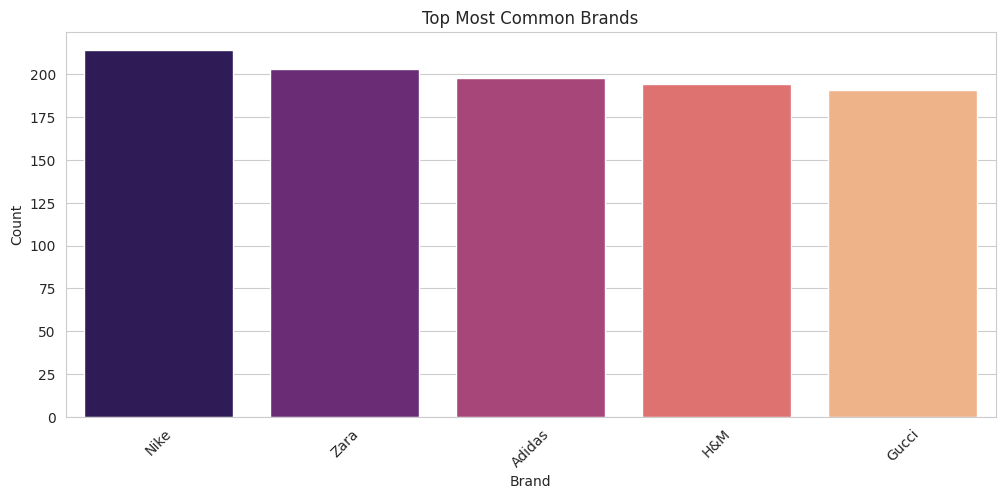

In [14]:
# Check if brand column exists
if "brand" in df.columns:
    plt.figure(figsize=(12,5))

    # Countplot for top brands
    top_brands = df["brand"].value_counts().head(10)
    sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette="magma", legend=False)
    plt.xticks(rotation=45)
    plt.title("Top Most Common Brands")
    plt.xlabel("Brand")
    plt.ylabel("Count")
    plt.show()

### **Step 6: User-Product Interactions**

This plot shows how many interactions each user has with different products.
A small number of users might interact a lot, while most users interact only a few times.

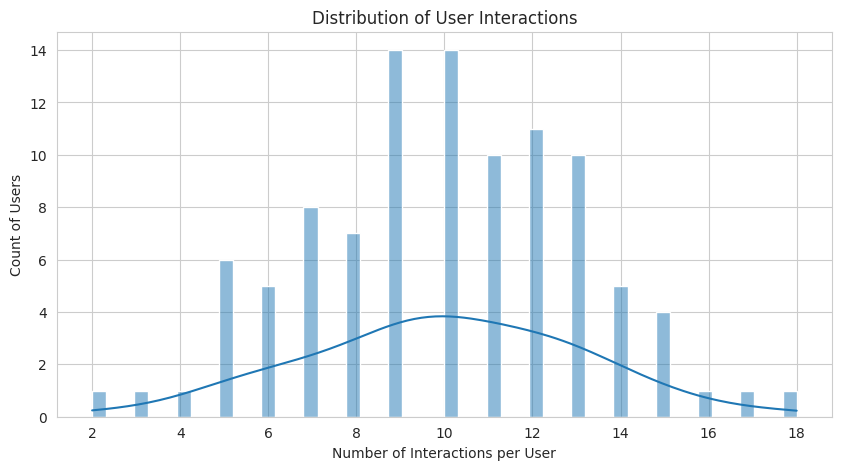

In [15]:
user_interactions = df.groupby("user_id")["product_id"].count()

plt.figure(figsize=(10, 5))
sns.histplot(user_interactions, bins=50, kde=True)
plt.xlabel("Number of Interactions per User")
plt.ylabel("Count of Users")
plt.title("Distribution of User Interactions")
plt.show()

### ***🔹Create a Separate Encoded Copy for Correlation Analysis:***

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df.copy()

# Identify categorical columns (non-numeric)
categorical_cols = df_encoded.select_dtypes(include=["object"]).columns

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

### **Step 7: Heatmap - Correlation Matrix**

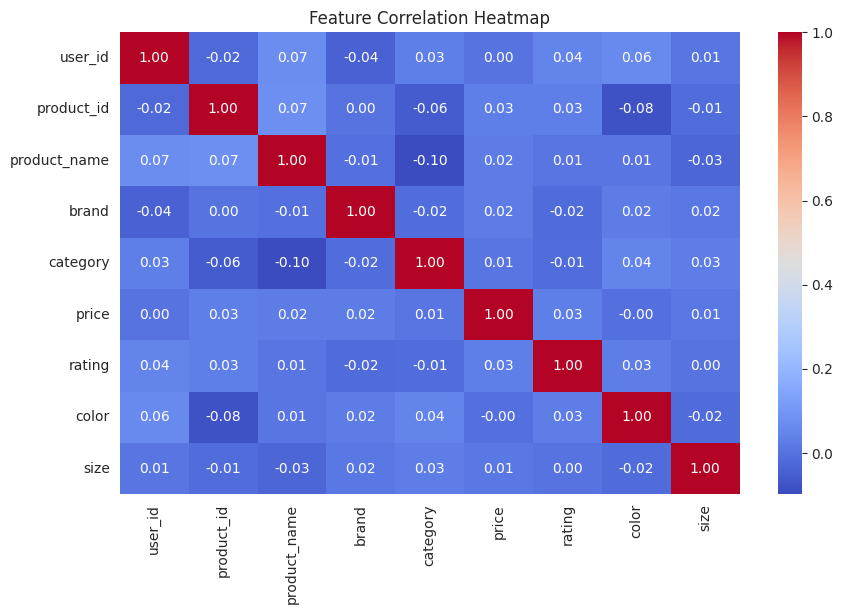

In [17]:
# Now use df_encoded for the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## **📌 Phase 3: Recommendation System Development**

### **Step 1: Collaborative Filtering (CF)**

In [18]:
!pip install scikit-surprise # Installing Surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505212 sha256=eeef99be16163493d7b2e1dd8075af39aba3d6d195fb329ff5077ba2278d6ddd
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [19]:
# Import Required Libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [20]:
# Convert Data to Surprise Format
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [21]:
# Train SVD Model
model = SVD()
cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2928  0.2944  0.3085  0.2791  0.2971  0.2944  0.0094  
MAE (testset)     0.2501  0.2475  0.2708  0.2377  0.2561  0.2524  0.0109  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.29282889, 0.29438388, 0.30845293, 0.27906842, 0.29712487]),
 'test_mae': array([0.25007188, 0.24746612, 0.27079322, 0.23771486, 0.25612062]),
 'fit_time': (0.01763606071472168,
  0.01685190200805664,
  0.01642751693725586,
  0.020128965377807617,
  0.01647353172302246),
 'test_time': (0.001046895980834961,
  0.0009200572967529297,
  0.0009219646453857422,
  0.0022771358489990234,
  0.0010313987731933594)}

### **Step 2: Hyperparameter Tuning**

In [22]:
from surprise.model_selection import GridSearchCV

# Define the Hyperparameter Grid

param_grid = {
    'n_factors': [50, 100, 150],   # Latent features
    'n_epochs': [10, 20, 30],      # Training iterations
    'lr_all': [0.002, 0.005, 0.01], # Learning rate
    'reg_all': [0.02, 0.05, 0.1]    # Regularization
}

In [23]:
# Perform Grid Search CV

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Print Best RMSE & Best Hyperparameters

print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best Parameters: {gs.best_params['rmse']}")

Best RMSE: 0.2891348473465022
Best Parameters: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.05}


In [24]:
# Train the model using the best parameters
best_svd = SVD(n_factors=gs.best_params['rmse']['n_factors'],
               n_epochs=gs.best_params['rmse']['n_epochs'],
               lr_all=gs.best_params['rmse']['lr_all'],
               reg_all=gs.best_params['rmse']['reg_all'])

cross_validate(best_svd, data, cv=5, verbose=True)

# 🔐 Save the trained best model for later use
import pickle

with open("best_svd_model.pkl", "wb") as f:
    pickle.dump(best_svd, f)

print("✅ Best SVD model saved successfully!")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2984  0.2820  0.2866  0.2820  0.3046  0.2907  0.0092  
MAE (testset)     0.2591  0.2446  0.2426  0.2431  0.2620  0.2503  0.0085  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
✅ Best SVD model saved successfully!


### **Step 3: Making Predictions for a Specific User**

In [25]:
# Predict the rating a user would give to a specific item
user_id = "23"
product_id = "813"

pred = best_svd.predict(user_id, product_id)
print(f"Predicted rating for User {user_id} and Product {product_id}: {pred.est}")

Predicted rating for User 23 and Product 813: 0.4873938132921112


###🔹**Top-N Recommendations for a User**

In [26]:
# Function to get Top-N Recommendations for a User
def get_top_n_recommendations(user_id, n=5):
    all_products = df['product_id'].unique()
    rated_products = df[df['user_id'] == user_id]['product_id'].values

    # Predict ratings for unrated products
    predictions = [best_svd.predict(user_id, prod_id) for prod_id in all_products if prod_id not in rated_products]

    # Sort predictions by estimated rating
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return [(pred.iid, pred.est) for pred in top_n]

# Example: Get top 5 recommendations for User 23
top_recommendations = get_top_n_recommendations('23', n=5)
print("Top Recommendations for User 23:", top_recommendations)

Top Recommendations for User 23: [(970, 0.5023379284991618), (609, 0.5014484023855933), (172, 0.5003407720077263), (638, 0.5000866368379875), (656, 0.5000214725814354)]


## 📌 **Phase 4: Content-Based Filtering (CBF)**

### **Step 1: Create a Combined Feature for Products**

In [27]:
### Step 1: Create a Combined Feature for Products
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert label-encoded categorical values back to strings
df["product_name"] = df["product_name"].astype(str)
df["brand"] = df["brand"].astype(str)
df["category"] = df["category"].astype(str)
df["color"] = df["color"].astype(str)

# Create combined feature column, replacing NaNs with empty strings
df["combined_features"] = (
    df["product_name"] + " " + df["brand"] + " " + df["category"] + " " + df["color"]
).fillna("")

# Remove rows where "combined_features" is empty
df = df[df["combined_features"].str.strip() != ""]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Transform combined features into TF-IDF matrix
feature_matrix = vectorizer.fit_transform(df["combined_features"])

# Check the shape of the matrix (to confirm it's not empty)
print("TF-IDF Matrix Shape:", feature_matrix.shape)


TF-IDF Matrix Shape: (1000, 19)


### **Step 2: Compute Product Similarity Matrix**

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(feature_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df["product_id"], columns=df["product_id"])

### **Step 3: Function to Get Similar Products**

In [29]:
### Step 3: Function to Get Similar Products with Similarity Score + Error Handling
def get_cbf_recommendations(product_id, top_n=5):
    # Check if product ID exists
    if product_id not in cosine_sim_df.index:
        print(f"❌ Product ID {product_id} not found in similarity matrix.")
        return pd.DataFrame()

    # Sort similarity scores in descending order (excluding the same product)
    sim_scores = cosine_sim_df[product_id].sort_values(ascending=False)[1:top_n+1]
    recommended_ids = sim_scores.index

    # Fetch product details from original dataframe
    recommendations = df[df["product_id"].isin(recommended_ids)][["product_id", "product_name", "brand"]].copy()
    recommendations["similarity_score"] = sim_scores.values

    return recommendations

# Example usage
get_cbf_recommendations(813)

,product_id,product_name,brand,similarity_score
36,37,Sweater,Zara,1.000000
571,572,Sweater,H&M,0.869466
671,672,Sweater,Zara,0.840369
812,813,Sweater,Zara,0.840369
843,844,Sweater,Zara,0.840369
